In [12]:
import pandas as pd
import random as rand
from PIL import Image
import requests


In [8]:
pd.set_option("display.max_columns", None)

In [9]:
pokedex_cols = ['index', 'pokedex_number', 'name', 'generation', 'status', 'species',
               'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
               'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
               'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
               'speed', 'catch_rate', 'base_friendship', 'base_experience',
               'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2',
               'percentage_male', 'egg_cycles', 'against_normal', 'against_fire',
               'against_water', 'against_electric', 'against_grass', 'against_ice',
               'against_fight', 'against_poison', 'against_ground', 'against_flying',
               'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
               'against_dragon', 'against_dark', 'against_steel', 'against_fairy']

In [10]:
all_moves = pd.read_csv('../data/all_moves.csv')
pokedex = pd.read_csv('../data/pokedex.csv',index_col=0,usecols=pokedex_cols)
pokemon_images = pd.read_csv('../data/pokemon_images.csv')
pokemon_moveset = pd.read_csv('../data/pokemon_moveset.csv')

C:\Users\aaron\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
pokedex

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318,45,49,49,65,65,45,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405,60,62,63,80,80,60,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525,80,82,83,100,100,80,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625,80,100,123,122,120,80,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309,39,52,43,60,50,65,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,8,Sub Legendary,Wild Horse Pokémon,1,Ice,NaN,2.2,800.0,1,Chilling Neigh,NaN,NaN,580,100,145,130,65,110,30,3.0,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,2.0,1.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,897,Spectrier,8,Sub Legendary,Swift Horse Pokémon,1,Ghost,NaN,2.0,44.5,1,Grim Neigh,NaN,NaN,580,100,65,60,145,80,130,3.0,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,0.0,1.0,1.0,1.0,1.00,1.0,0.0,0.5,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,898,Calyrex,8,Legendary,King Pokémon,2,Psychic,Grass,1.1,7.7,1,Unnerve,NaN,NaN,500,100,80,80,80,80,80,3.0,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,2.0,0.5,0.5,0.50,2.0,0.5,2.0,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0


In [14]:
pokedex[pokedex['pokedex_number'].isin(pokedex['pokedex_number'].value_counts().where(lambda x: x>1).dropna().index)].sort_values('pokedex_number')

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525,80,82,83,100,100,80,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.00,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.00,1.0,0.5
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625,80,100,123,122,120,80,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.00,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.00,1.0,0.5
6,6,Charizard,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,90.5,2,Blaze,NaN,Solar Power,534,78,84,78,109,85,100,45.0,70.0,240.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.50,2.0,2.0,0.25,1.0,0.5,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.00,0.5,0.5
7,6,Mega Charizard X,1,Normal,Flame Pokémon,2,Fire,Dragon,1.7,110.5,1,Tough Claws,NaN,NaN,634,78,130,111,130,85,100,45.0,70.0,285.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.25,1.0,0.5,0.25,1.0,1.0,1.0,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.00,0.5,1.0
8,6,Mega Charizard Y,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,100.5,1,Drought,NaN,NaN,634,78,104,78,159,115,100,45.0,70.0,285.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.50,2.0,2.0,0.25,1.0,0.5,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.00,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,892,Urshifu Single Strike Style,8,Sub Legendary,Wushu Pokémon,2,Fighting,Dark,1.9,105.0,1,Unseen Fist,NaN,NaN,550,100,130,100,63,60,97,3.0,NaN,NaN,Slow,1,Undiscovered,NaN,87.5,120.0,1.0,1.00,1.0,1.0,1.00,1.0,2.0,1.0,1.0,2.0,0.0,1.00,0.5,0.5,1.0,0.25,1.0,4.0
1036,892,Urshifu Rapid Strike Style,8,Sub Legendary,Wushu Pokémon,2,Fighting,Water,1.9,105.0,1,Unseen Fist,NaN,NaN,550,100,130,100,63,60,97,3.0,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.50,0.5,2.0,2.00,0.5,1.0,1.0,1.0,2.0,2.0,0.50,0.5,1.0,1.0,0.50,0.5,2.0
1043,898,Calyrex Ice Rider,8,Legendary,High King Pokémon,2,Psychic,Ice,2.4,809.1,1,As One,NaN,NaN,680,100,165,150,85,130,50,3.0,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,2.00,1.0,1.0,1.00,0.5,1.0,1.0,1.0,1.0,0.5,2.00,2.0,2.0,1.0,2.00,2.0,1.0


In [32]:
pokemon_pick = input('Enter a Pokemon name or number: ')

try:
    pokemon_pick = int(pokemon_pick)
except ValueError:
    if pokemon_pick in list(pokedex['name']):
        pokemon_series = pokedex[pokedex['name'] == pokemon_pick]
    else:
        print('Please pick a valid Pokemon name')
else:
    if pokemon_pick in list(pokedex['pokedex_number']):
        pokemon_series = pokedex[pokedex['pokedex_number'] == pokemon_pick]
    else:
        print('Please pick a valid Pokemon number')
pokemon_series

Enter a Pokemon name or number1


,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318,45,49,49,65,65,45,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5


In [22]:
pokemon_series

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,6,Charizard,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,90.5,2,Blaze,NaN,Solar Power,534,78,84,78,109,85,100,45.0,70.0,240.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,2.0,0.25,1.0,0.5,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5


In [20]:
chosen_name in pokedex['name']

False

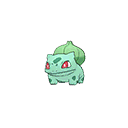

In [21]:
url = pokemon_images['image_url'].values[0]
sprite = requests.get(url, stream = True).raw
Image.open(sprite)
